# 단항 회귀 분석 실습 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1단계: 데이터 준비
df = pd.read_csv("./datas/auto-mpg.csv", header=None)
df
#print(df.info())


,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [8]:
#컬럼 이름 (변수, 특성 이름) 지정
df.columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'name']
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [21]:
pd.set_option('display.max_columns', 10)
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [23]:
#2단계: 데이터 탐색
print(df.info()) 
print(df.describe())
print(df['horsepower'].unique())  
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000   

In [26]:
#df[df['horsepower'] =='?'] =np.nan
df['horsepower'].replace('?', np.nan, inplace=True) 
#horsepower열이 NaN인 행을 삭제
df.dropna(subset=['horsepower'], axis=0, inplace=True)

In [33]:
df['horsepower'] = df['horsepower'].astype('float')
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.0000

In [34]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [35]:
#3단계 : 분석에 사용할 특성(열, 변수) 선택 (연비, 실린더, 마력, 중력)
# 연비에 영향을 주는 변수를 뽑는다.
ndf = df[[ 'mpg', 'cylinders','horsepower', 'weight' ]]
print(ndf.head())




    mpg  cylinders  horsepower  weight
0  18.0        8.0       130.0  3504.0
1  15.0        8.0       165.0  3693.0
2  18.0        8.0       150.0  3436.0
3  16.0        8.0       150.0  3433.0
4  17.0        8.0       140.0  3449.0


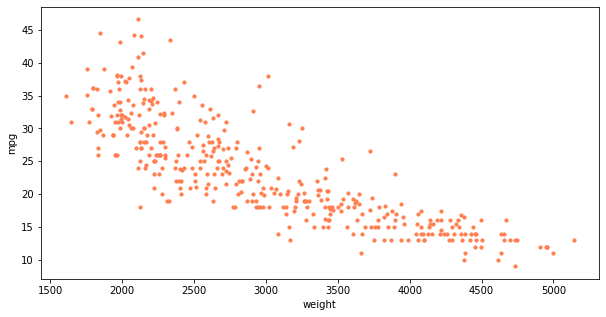

In [41]:
#종속변수(mpg)와 다른 변수('cylinders','horsepower', 'weight')간의 선형관계여부 확인
# matplotlib로 산점도 그리기
ndf.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()
plt.close()

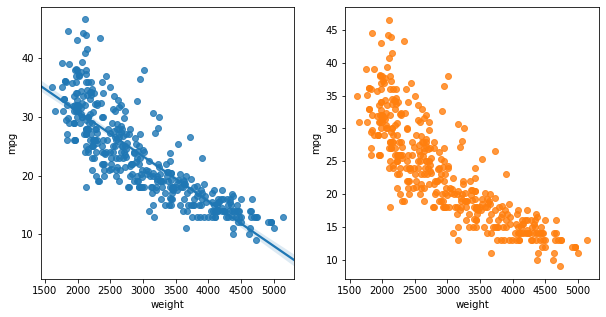

In [43]:
#seaborn으로 산점도 그릭
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax1)  #회귀선을 기본적으로 표시해줌
sns.regplot(x='weight', y='mpg', data=ndf, ax=ax2, fit_reg=False)
plt.show()
plt.close()


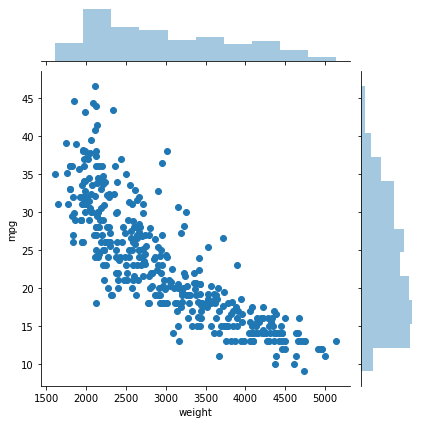

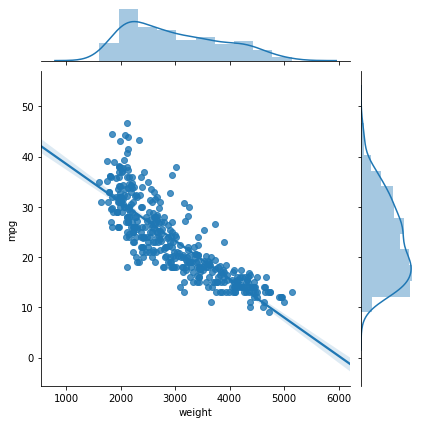

In [45]:
sns.jointplot(x='weight', y='mpg', data=ndf)
sns.jointplot(x='weight', y='mpg', data=ndf, kind='reg')  #회귀선 표시
plt.show()
plt.close()


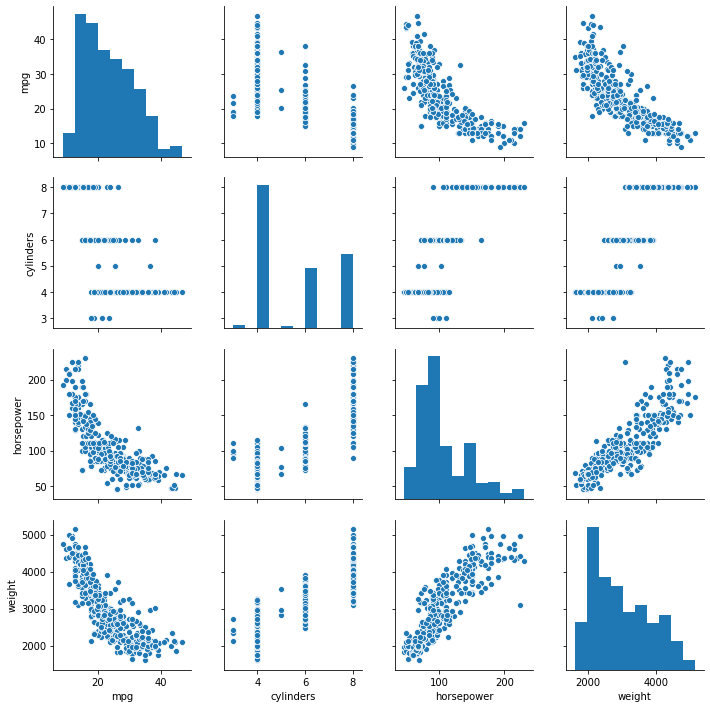

In [48]:
sns.pairplot(ndf)
plt.show()
plt.close()

In [50]:
ndf

,mpg,cylinders,horsepower,weight
0,18.0,8.0,130.0,3504.0
1,15.0,8.0,165.0,3693.0
2,18.0,8.0,150.0,3436.0
3,16.0,8.0,150.0,3433.0
4,17.0,8.0,140.0,3449.0
...,...,...,...,...
393,27.0,4.0,86.0,2790.0
394,44.0,4.0,52.0,2130.0
395,32.0,4.0,84.0,2295.0
396,28.0,4.0,79.0,2625.0


In [54]:
# 4단계 : 훈련 데이터와 테스트 데이터로 분리

X= ndf[['weight']]   #독립변수 X : 무게
X
#type(X)

pandas.core.frame.DataFrame

In [56]:
Y=ndf['mpg']    #종속변수 Y : 연비
Y
#type(Y)

pandas.core.series.Series

In [58]:
 #train data 와 test data를 7:3 비율로 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)  #랜덤 추출값 10

In [59]:
X_train

,weight
38,4209.0
172,2223.0
277,3410.0
196,2164.0
357,2615.0
...,...
375,1980.0
322,2110.0
15,2833.0
127,2901.0


In [60]:
Y_train

38     14.0
172    25.0
277    16.2
196    24.5
357    32.9
       ... 
375    36.0
322    46.6
15     22.0
127    19.0
267    27.5
Name: mpg, Length: 274, dtype: float64

In [62]:
# 5단계 : 단순회귀분석 - 학습
from sklearn.linear_model import LinearRegression  #선형회귀 라이브러리의 선형회귀분석 모듈 

lr = LinearRegression()  #단순 선형회귀분석 객체 생성

lr.fit(X_train, Y_train)  #학습

r_square = lr.score(X_test, Y_test) # 결정 계수 계산
print(r_square )


0.6822458558299325


In [63]:
print('기울기 a : ', lr.coef_)
print('절편 b : ', lr.intercept_)



기울기 a :  [-0.00775343]
절편 b :  46.710366257280086


In [64]:
y_predict =lr.predict(X)   #독립변수에 대한 예측된 종속변수값 

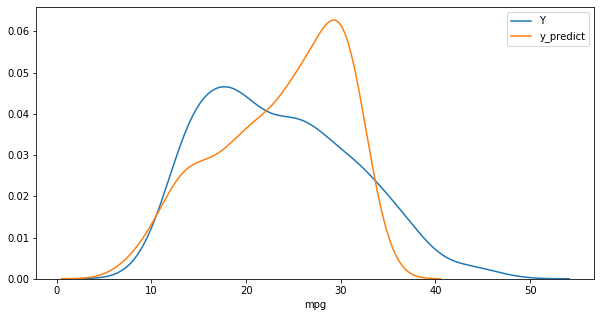

In [65]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(Y, hist=False, label='Y')
ax2 = sns.distplot(y_predict, hist=False, label='y_predict', ax=ax1)
plt.show()
plt.close()
